In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import pylab as pl
import numpy as np  

from sklearn.svm import SVC
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 17})

#### Load porosity and permeability data

From Douglas Cant and Valerie Ethier (1984). 
Lithology-Dependent Diagenetic Control of Reservoir Properties of Conglomerates, Falher Member, Elmworth Field, Alberta. AAPG Bulletin, 68 (8), pages 1044-1054.  Data accessed through [USGS Open-file Report 03-420A](https://pubs.usgs.gov/of/2003/ofr-03-420/ofr-03-420.html): Catalogue of Porosity and Permeability from Core Plugs in Siliciclastic Rocks.


In [3]:
data = np.loadtxt('9-Cant&Ethier-1994.txt', skiprows = 1, usecols=(0,1,2,3))

#### Crossplot data

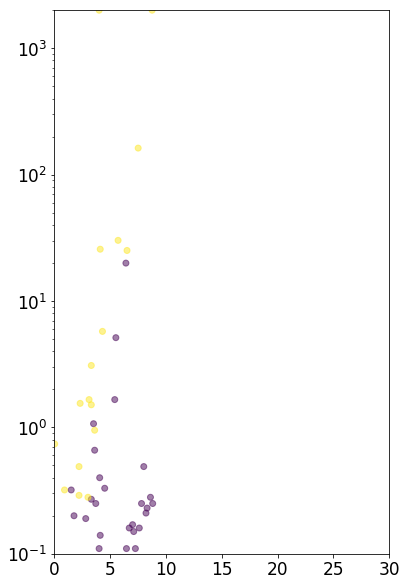

In [4]:
fig = plt.figure(figsize=(6,10))
ax = plt.gca()
ax.scatter( data[:,0], data[:,2], c = data[:,3], alpha = 0.5)
ax.set_yscale('log')
ax.set_xlim(0, 30)
ax.set_ylim(0.1, 2000)
plt.show()

#### Split into feature and target variables

In [5]:
X = [[poro, perm] for poro, perm in zip(data[:-1,0], data[:-1,1])]
Y = data[:-1,3]

#### Create two models with different gamma parameter, fit the data

In [6]:
clf = SVC(C=5, kernel='rbf', degree=3, gamma=0.05)
clf.fit(X, Y)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
#clf1 = SVC(C=50000,  kernel='rbf', degree=3, gamma=15) # test regularization with too high gamma
clf1 = SVC(C=5,  kernel='rbf', degree=3, gamma=15)
clf1.fit(X, Y)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=15, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Create a mesh to plot the decision regions; each region is assigned a different color

Adapted from a plotting utility in Sebastian Rascka's [Python Machine Learning](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch02/ch02.ipynb).

In [8]:
x_min = -1.; x_max = 10
y_min = -1.5; y_max = 5

In [9]:
h = 0.01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z  = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

In [10]:
Z = Z.reshape(xx.shape)
Z1 = Z1.reshape(xx.shape)

ssx = [X[i][0] for i in range(0, len(Y)) if Y[i]==1]
cgx = [X[i][0] for i in range(0, len(Y)) if Y[i]==2]
ssy = [X[i][1] for i in range(0, len(Y)) if Y[i]==1]
cgy = [X[i][1] for i in range(0, len(Y)) if Y[i]==2]

In [11]:
colors = ['C1', 'C4']  # R -> G -> B
n_bins = 2  
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

#### Plot the results

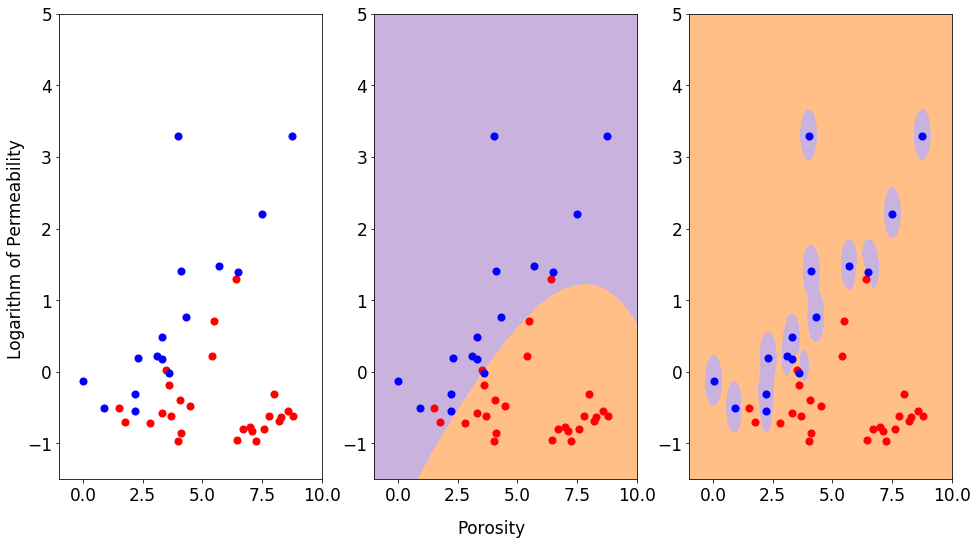

In [12]:
fig, (ax3, ax4, ax5) = plt.subplots(figsize=(16, 12), ncols=3)

ax3.imshow(Z*0, cmap='bone_r', extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower', aspect = 3)
ax3.scatter(ssx, ssy, c = 'r', s = 50)
ax3.scatter(cgx, cgy, c = 'b', s = 50)

ax4.imshow(Z, cmap=cm, extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower', aspect = 3)
ax4.scatter(ssx, ssy, c = 'r', s = 50)
ax4.scatter(cgx, cgy, c = 'b', s = 50)

ax5.imshow(Z1, cmap=cm, extent=[x_min, x_max, y_min, y_max], alpha=.5, origin='lower', aspect = 3)
ax5.scatter(ssx, ssy, c = 'r', s = 50)
ax5.scatter(cgx, cgy, c = 'b', s = 50)

fig.text(0.5, 0.17, 'Porosity', ha='center')
fig.text(0.08, 0.5, 'Logarithm of Permeability', va='center', rotation='vertical')

fig.savefig('gamma.png', dpi=400, bbox_inches='tight', pad_inches=0.4)
plt.show()